In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import itertools
from collections import Counter
import nltk
from nltk.corpus import stopwords
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Nikhil
[nltk_data]     Hariharan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Nikhil
[nltk_data]     Hariharan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nikhil Hariharan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Nikhil
[nltk_data]     Hariharan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
customer = pd.read_csv('BankReviews.csv', encoding='windows-1252')
customer.head()

,Date,Stars,Reviews,BankName
0,10-04-2017,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,10-02-2017,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,21-08-2017,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,17-12-2017,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,27-05-2016,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      505 non-null    object
 1   Stars     505 non-null    int64 
 2   Reviews   505 non-null    object
 3   BankName  505 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.9+ KB


In [8]:
# using only the Reviews column for further analysis
X = customer['Reviews']
X.head()

0    Great job, Wyndham Capital! Each person was pr...
1    Matthew Richardson is professional and helpful...
2    We had a past experience with Wyndham Mortgage...
3    We have been dealing with Brad Thomka from the...
4    I can't express how grateful I am for the supp...
Name: Reviews, dtype: object

# Data Preprocessing

In [9]:
# UDF to clean the reviews
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = "".join([char for char in text if char not in string.punctuation])
    return text

In [10]:
# applying clean_text function defined above to remove punctuation, strip extra spaces and convert each word to lowercase
X = X.apply(lambda val: clean_text(val))

In [11]:
X.head()

0    great job wyndham capital each person was prof...
1    matthew richardson is professional and helpful...
2    we had a past experience with wyndham mortgage...
3    we have been dealing with brad thomka from the...
4    i cant express how grateful i am for the suppo...
Name: Reviews, dtype: object

In [12]:
# define list of common banking terms
banking_words = ['documents','process','loan','mortgage','account','credit','debit','transaction','balance','rate',
                 'withdraw','overdraw','overdraft','payment','statement','deposit','collateral','guarantor','bank',
                 'charge','business','cash','amount','documentation']

# Sentiment & Aspect Analysis

In [13]:
sent_analyzer = SentimentIntensityAnalyzer()

def sentiment(text):
    return sent_analyzer.polarity_scores(text)['compound']

customer['Polarity'] = X.apply(sentiment)
customer.head()

,Date,Stars,Reviews,BankName,Polarity
0,10-04-2017,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,0.7650
1,10-02-2017,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,0.8402
2,21-08-2017,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,0.9348
3,17-12-2017,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,0.9606
4,27-05-2016,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,0.4612


In [14]:
# defining upper & lower bounds for polarity scores
upper_lim1 = 0.6
upper_lim2 = 0.2
lower_lim1 = -0.2
lower_lim2 = -0.6

def sentiment_class(data):
    if data['Polarity'] > upper_lim1:
        val = 'Very_Positive'
    elif data['Polarity'] <= upper_lim1 and data['Polarity'] > upper_lim2:
        val = 'Less_Positive'
    elif data['Polarity'] <= upper_lim2 and data['Polarity'] > lower_lim1:
        val = 'Neutral'
    elif data['Polarity'] <= lower_lim1 and data['Polarity'] > lower_lim2:
        val = 'Less_Negative'
    else:
        val = 'Very_Negative'
        
    return val

customer['Sentiment'] = customer.apply(sentiment_class, axis=1)
customer.head()

,Date,Stars,Reviews,BankName,Polarity,Sentiment
0,10-04-2017,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,0.7650,Very_Positive
1,10-02-2017,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,0.8402,Very_Positive
2,21-08-2017,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,0.9348,Very_Positive
3,17-12-2017,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,0.9606,Very_Positive
4,27-05-2016,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,0.4612,Less_Positive


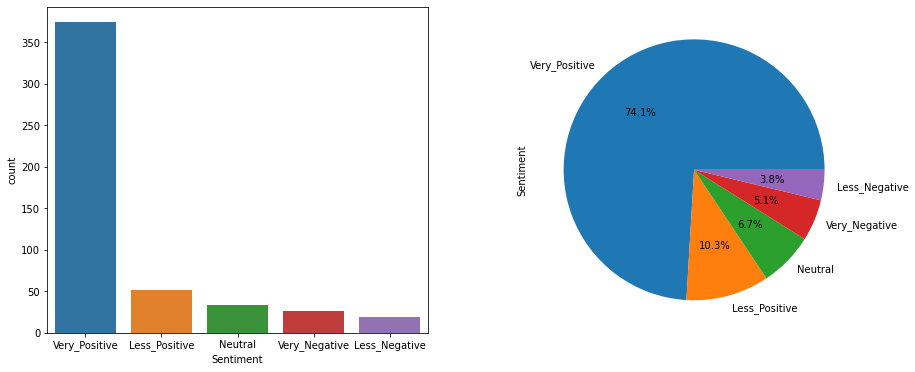

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
_ = sns.countplot(x='Sentiment', data=customer, ax=ax[0])
_ = customer['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])

In [16]:
nlp = spacy.load('en_core_web_sm')

In [17]:
def pos(text):
    doc = nlp(text)
    # need to select only Noun tokens
    asp = [token.text for token in doc if token.pos_ == 'NOUN']
    aspect = set([i for i in asp if i in banking_words])
    aspects = list(aspect)
    return aspects

customer['Aspects'] = X.apply(pos)

In [18]:
customer.head()

,Date,Stars,Reviews,BankName,Polarity,Sentiment,Aspects
0,10-04-2017,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,0.7650,Very_Positive,[process]
1,10-02-2017,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,0.8402,Very_Positive,[mortgage]
2,21-08-2017,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,0.9348,Very_Positive,"[loan, mortgage]"
3,17-12-2017,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,0.9606,Very_Positive,"[loan, mortgage]"
4,27-05-2016,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,0.4612,Less_Positive,[process]


In [19]:
customer.tail()

,Date,Stars,Reviews,BankName,Polarity,Sentiment,Aspects
500,06-02-2016,1,\r\nI never write reviews but had to this time...,North American Savings Bank,0.9540,Very_Positive,"[loan, credit, amount, account, documents, bus..."
501,25-07-2016,1,\r\nIt all started when Bob G ran a credit che...,North American Savings Bank,-0.0457,Neutral,"[credit, bank]"
502,27-09-2017,1,\r\nWhat a horrible experience. We have excell...,North American Savings Bank,-0.3129,Less_Negative,"[loan, credit, business]"
503,24-12-2017,1,"\r\nRep was extremely professional, friendly, ...",North American Savings Bank,0.9886,Very_Positive,"[loan, rate]"
504,19-03-2017,1,\r\nI was working with a loan consultant from ...,North American Savings Bank,0.9442,Very_Positive,"[loan, rate]"


In [20]:
# separate out count of aspects from each sentiments
asp_vp = customer['Aspects'][customer['Sentiment'] == 'Very_Positive']
asp_vp_lst = list(itertools.chain.from_iterable(asp_vp))
print('Very Positive Aspect Counts:', len(asp_vp_lst))

asp_lp = customer['Aspects'][customer['Sentiment'] == 'Less_Positive']
asp_lp_lst = list(itertools.chain.from_iterable(asp_lp))
print('Less Positive Aspect Counts:', len(asp_lp_lst))

asp_n = customer['Aspects'][customer['Sentiment'] == 'Neutral']
asp_n_lst = list(itertools.chain.from_iterable(asp_n))
print('Neutral Aspect Counts:', len(asp_n_lst))

asp_ln = customer['Aspects'][customer['Sentiment'] == 'Less_Negative']
asp_ln_lst = list(itertools.chain.from_iterable(asp_ln))
print('Less Negative Aspect Counts:', len(asp_ln_lst))

asp_vn = customer['Aspects'][customer['Sentiment'] == 'Very_Negative']
asp_vn_lst = list(itertools.chain.from_iterable(asp_vn))
print('Very Negative Aspect Counts:', len(asp_vn_lst))

Very Positive Aspect Counts: 517
Less Positive Aspect Counts: 82
Neutral Aspect Counts: 53
Less Negative Aspect Counts: 41
Very Negative Aspect Counts: 64


In [21]:
# creating function to make plots for aspect counts in each sentiment
def countSentimentAspectPlot(data):
    counts_asp = Counter(data)
    counts_asp_dict = dict(counts_asp)
    counts_asp_df = pd.DataFrame(counts_asp_dict.items(), columns=['Aspect','Counts'])
    plt.figure(figsize=(20,15))
    plots = sns.barplot(x='Aspect', y='Counts', data=counts_asp_df.sort_values('Counts', ascending=False))
    # iterating over the bars one by one
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width()/2, bar.get_height()),
                       ha='center', va='center', size=15, xytext=(0,8), textcoords='offset points')

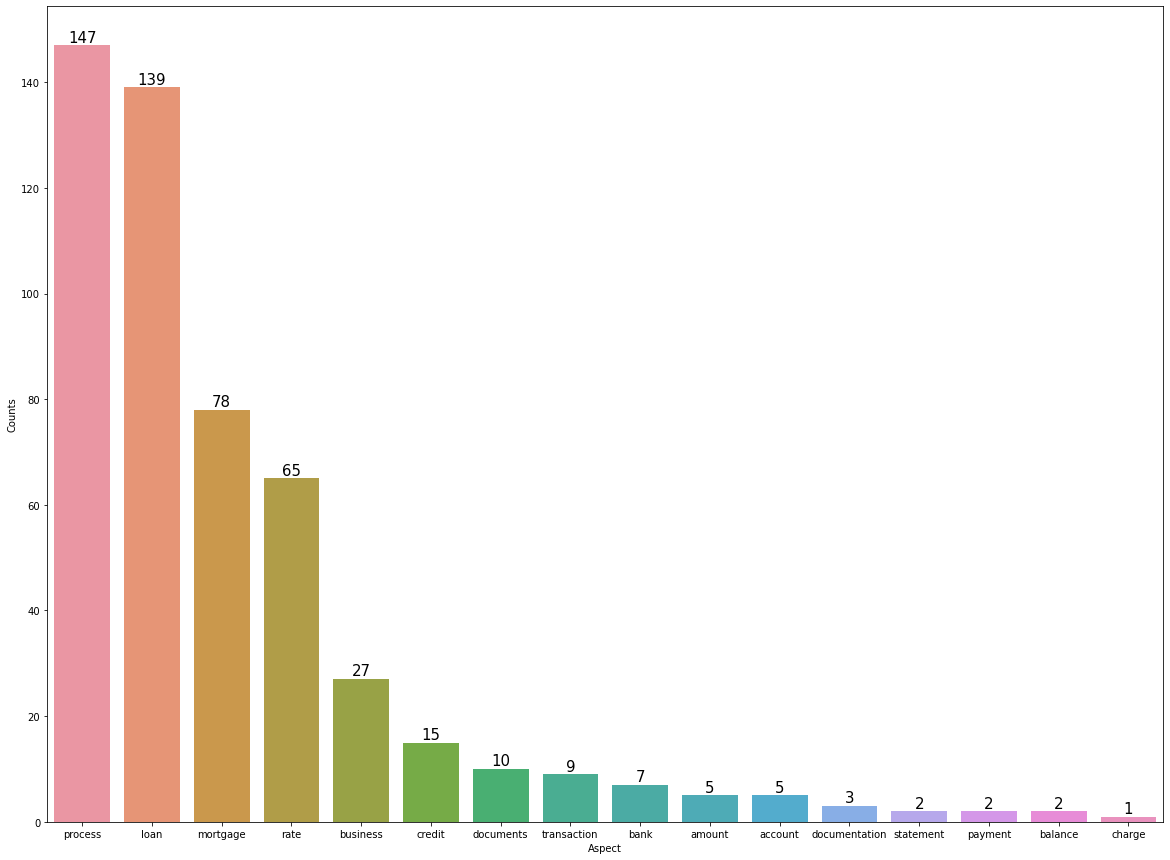

In [22]:
countSentimentAspectPlot(asp_vp_lst)

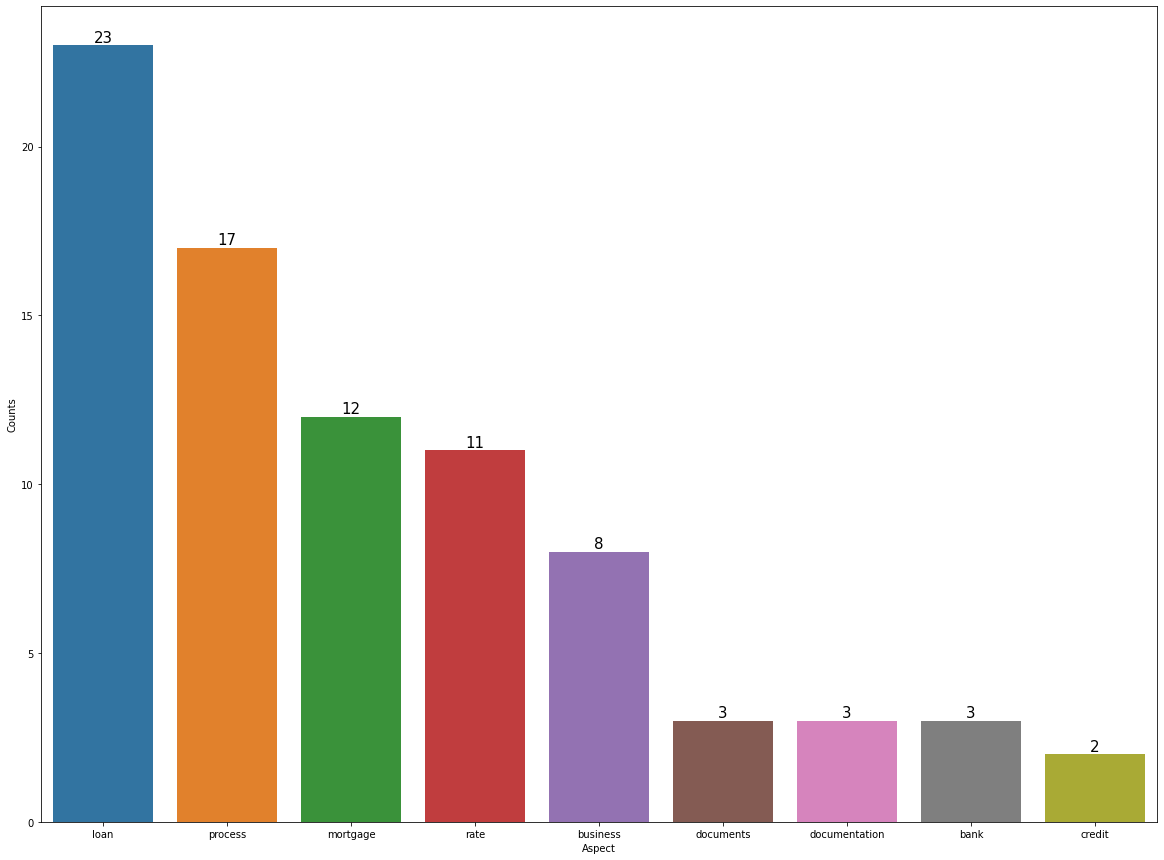

In [23]:
countSentimentAspectPlot(asp_lp_lst)

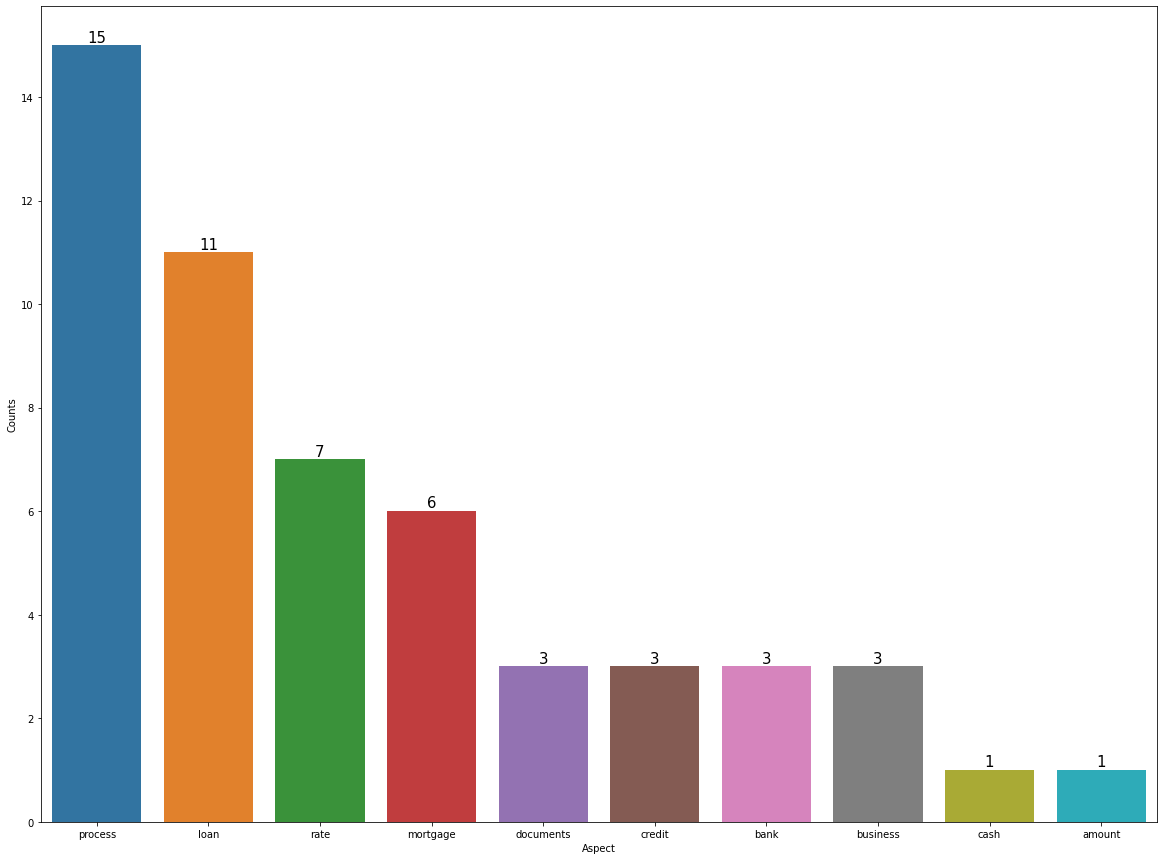

In [24]:
countSentimentAspectPlot(asp_n_lst)

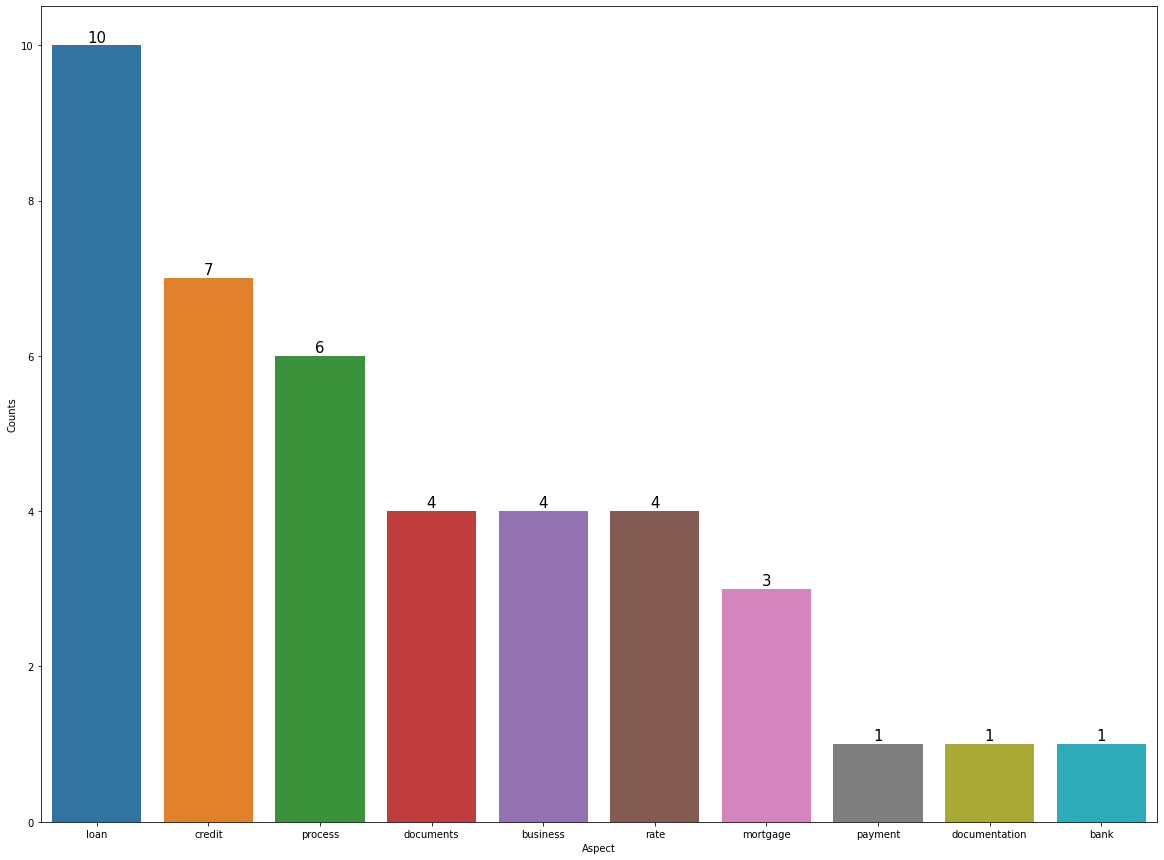

In [25]:
countSentimentAspectPlot(asp_ln_lst)

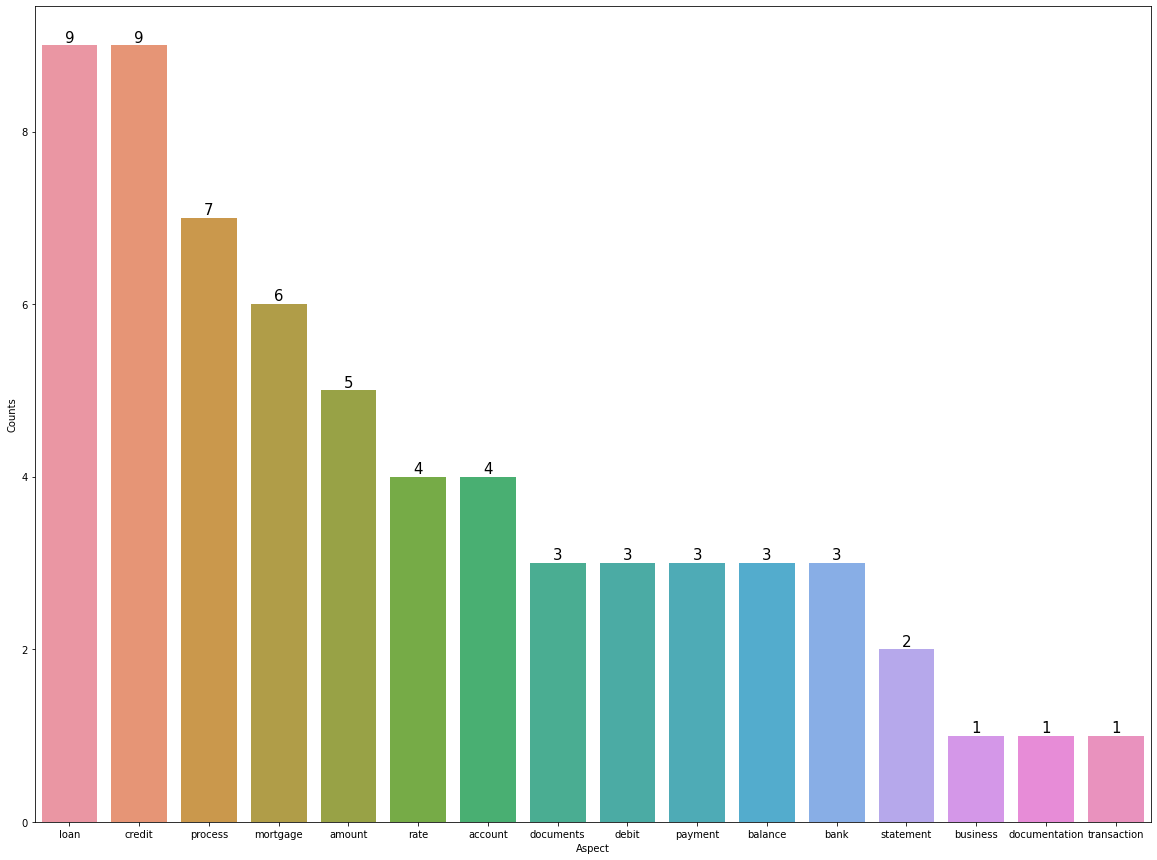

In [26]:
countSentimentAspectPlot(asp_vn_lst)